# Problem 1: Covariance - Josh
- When given a data matrix, an easy way to tell if any two columns are correlated is to look at a scatter plot of each column against each other column.  
For a warm up, do this:  
Look at the data in DF1 in Lab2 Data.zip.  
Which columns are (pairwise) correlated?  
Figure out how to do this with Pandas, and also how to do this with Seaborn.  

- Compute the covariance matrix of the data. Write the explicit expression for what this is,  
and then use any command you like (e.g., np.cov) to compute the 4 ×4 matrix.  
Explain why the numbers that you get fit with the plots you got.

- The above problem in reverse. Generate a zero-mean multivariate Gaussian random variable in 3 dimensions,  
Z = (X1,X2,X3) so that (X1,X2) and (X1,X3) are uncorrelated, but (X2,X3) are correlated.  
Specifically: choose a covariance matrix that has the above correlations structure, and write this down. Then find a way to generate samples from this Gaussian.  
Choose one of the non-zero covariance terms (Cij , if C denotes your covariance matrix) and plot it vs the estimated covariance term, as the number of samples you use scales.  
The goal is to get a visual representation of how the empirical covariance converges to the true (or family) covariance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv(r"C:\Users\Joshd\Downloads\Lab2_Data\DF1")
data.drop(data.columns[0], axis = 1, inplace=True)
print(np.shape(data))
data.head()

(10000, 4)


,0,1,2,3
0,1.038502,0.899865,0.835053,-0.971528
1,0.320455,-0.647459,0.149079,0.352593
2,0.055480,2.234771,0.271672,-2.108739
3,-0.007260,-0.524299,-0.126550,0.670827
4,-1.237390,-1.377017,-1.049932,1.342079


<AxesSubplot:xlabel='0', ylabel='2'>

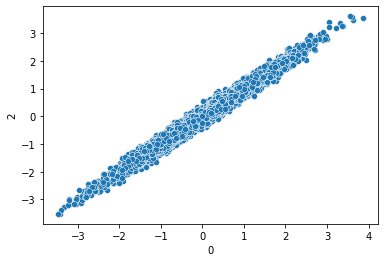

In [24]:
sns.scatterplot(x = data["0"], y = data["2"])

Columns 0 and 2 are correlated

<AxesSubplot:xlabel='1', ylabel='3'>

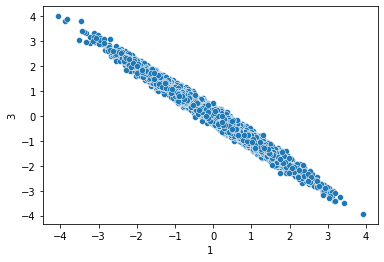

In [25]:
sns.scatterplot(x = data["1"], y = data["3"])

Columns 1 and 3 are also correlated

# $cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$ 

In [32]:
np.shape(np.cov(data.T))
np.cov(data.T)

array([[ 1.00155793, -0.00401176,  0.99162409,  0.00412485],
       [-0.00401176,  1.00537841, -0.00409877, -0.99545662],
       [ 0.99162409, -0.00409877,  1.00158867,  0.00408108],
       [ 0.00412485, -0.99545662,  0.00408108,  1.00516828]])

If we look at entry (0,2) which corresponds to the covariance of column 0 and 2, we can see that we get a value of 0.99 which means that the two columns are positively correlated.  This correctly matches with our first plot which shows a  Also if we look at entry (1,3), we can see that the covariance between column 1 and 3 is -0.9954 which means that they are negativly correlated.

# Problem 2: Outliers - Jackson

Consider the two-dimensional data in DF2 in *Lab2 Data.zip*.  
<b>Look at a scatter plot of the data.</b>  

It contains two points that look like potential outliers.  
<b>Which one is “more” outlying?</b>  
Propose a transformation of the data that makes it clear that the point at (−1,1) is more outlying than the point at (5.5,5),   
even though the latter point is “farther away” from the nearest points.  
Plot the data again after performing this transformation.  
Provide discussion as appropriate to justify your choice of transformation.  
<i>Hint: if y comes from a standard Gaussian in two dimensions  
(i.e., with covariance equal to the two by two identity matrix)</i>

$$Q = \begin{bmatrix} 2 & 1/2 \\ 1/2 & 2\end{bmatrix}$$

What is the covariance matrix of the random variable z = Qy? If you are given z, how would you
create a random Gaussian vector with covariance equal to the identity, using z?

# Problem 3: Popular Names - Jhanvi

The goal of this exercise is for you to get more experience with Pandas, and to get a chance to  
explore a cool data set. Download the file Names.zip from Canvas. This contains the frequency  
of all names that appeared more than 5 times on a social security application from 1880 through 2015.
- Write a program that on input k and XXXX, returns the top k names from year XXXX.  
- Write a program that on input Name returns the frequency for men and women of the name `Name`.
- It could be that names are more diverse now than they were in 1880, so that a name may be relatively the most popular, though its frequency may have been decreasing over the years.  
Modify the above to return the relative frequency. Note that in the next coming lectures we will learn how to quantify diversity using entropy.
- Find all the names that used to be more popular for one gender, but then became more popular for another gender.
- (Optional) Find something cool about this data set.

# Problem 4: Starting in Kaggle - Josh

Later in this class, you will be participating in the in-class Kaggle competition made specifically
for this class. In that one, you will be participating on your own. This is a warmup- the more
effort and research you put into this assignment the easier it will be to compete into the real Kaggle
competition that you will need to do soon.
1. Let’s start with our first Kaggle submission in a playground regression competition. Make an
account to Kaggle and find
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/
2. Follow the data preprocessing steps from
https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-
models. Then run a ridge regression using α = 0.1. Make a submission of this prediction,
what is the RMSE you get?
(Hint: remember to exponentiate np.expm1(ypred) your predictions).
3. Compare a ridge regression and a lasso regression model. Optimize the alphas using cross
validation. What is the best score you can get from a single ridge regression model and from
a single lasso model?
4. Plot the l0 norm (number of nonzeros) of the coefficients that lasso produces as you vary the
strength of regularization parameter alpha.
5. Add the outputs of your models as features and train a ridge regression on all the features
plus the model outputs (This is called Ensembling and Stacking). Be careful not to overfit.
What score can you get? (We will be discussing ensembling more, later in the class, but you
can start playing with it now).
6. Install XGBoost (Gradient Boosting) and train a gradient boosting regression. What score
can you get just from a single XGB? (you will need to optimize over its parameters). We will
discuss boosting and gradient boosting in more detail later. XGB is a great friend to all good
Kagglers!
7. Do your best to get the more accurate model. Try feature engineering and stacking many
models. You are allowed to use any public tool in python. No non-python tools allowed.
8. (Optional) Read the Kaggle forums, tutorials and Kernels in this competition. This is an
excellent way to learn. Include in your report if you find something in the forums you like, or
if you made your own post or code post, especially if other Kagglers liked or used it afterwards.
2
9. Be sure to read and learn the rules of Kaggle! No sharing of code or data outside the Kaggle
forums. Every student should have their own individual Kaggle account and teams can be
formed in the Kaggle submissions with partners. This is more important for live competitions
of course.
10. As in the real in-class Kaggle competition (which will be next), you will be graded based on
your public score (include that in your report) and also on the creativity of your solution.
In your report (that you will submit as a pdf file), explain what worked and what did
not work. Many creative things will not work, but you will get partial credit for developing
them. We will invite teams with interesting solutions to present them in class.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

C:\Users\Joshd\AppData\Local\Temp\ipykernel_4856\2813327740.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [7]:
train = pd.read_csv(r"C:\Pycharm\House Prices ML\train.csv")
test = pd.read_csv(r"C:\Pycharm\House Prices ML\test.csv")

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
all_data = pd.concat((train.loc[:, 'MSSubClass': 'SaleCondition'], test.loc[:, 'MSSubClass': 'SaleCondition']))

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

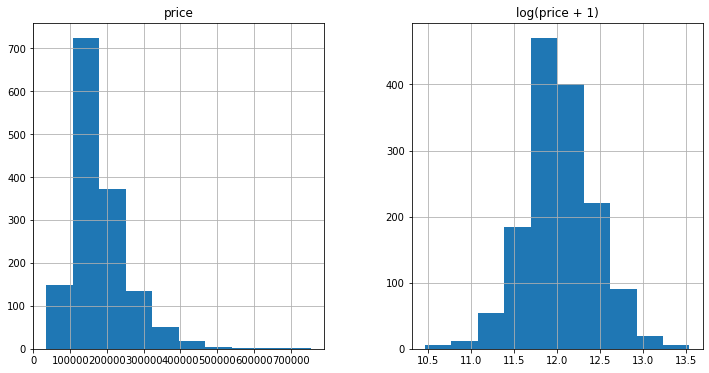

In [10]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [11]:
from unicodedata import numeric


train["SalePrice"] = np.log1p(train["SalePrice"]) #Log transform the target

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [12]:
all_data = pd.get_dummies(all_data) #convert all categorical data into dummy variables 

In [13]:
all_data = all_data.fillna(all_data.mean()) #Filling all NA's with mean of each column

In [15]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [16]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [21]:
model_ridge = Ridge()
rmse= np.sqrt(-cross_val_score(Ridge(0.1), X_train, y, scoring="neg_mean_squared_error", cv = 5))
print("RMSE: ", rmse)
print("RMSE Average:", rmse.mean())


RMSE:  [0.12156718 0.14425787 0.1516712  0.11267361 0.15870705]
RMSE Average: 0.137775382771879


# RMSE:  [0.12156718, 0.14425787, 0.1516712,  0.11267361, 0.15870705]
# RMSE Average: 0.137775382771879

In [23]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

Text(0, 0.5, 'rmse')

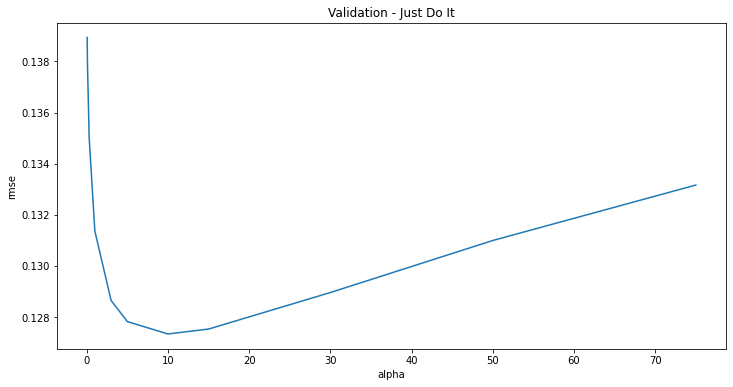

In [24]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [25]:
print(cv_ridge.min())

0.12733734668670754


We can see that an alpha of 10 will best minimize our RMSE from the plot

In [26]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(model_lasso).mean()

0.1225673588504814

The best RMSE score for ridge is 0.127 and the best RMSE score for lasso is 0.123